# RFM Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
!pip install squarify 

In [3]:
import squarify

In [4]:
#configuartion 
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

In [15]:
raw9 = pd.read_excel("rfm_data.xlsx")
df1 = raw9.copy()

In [16]:
df1.shape

(108710, 4)

In [17]:
df1

,Customer_Name,Date,Quantity,Total_sales_amount
0,Mst. Sabina Khatun '[0042971'],2024-01-15,30.00,2274.00
1,Mst.Khushi AKter '[3303800'],2024-03-31,1.00,1567.00
2,Mst. Lovely Akter '[101696'],2024-03-21,4.00,669.00
3,Hosneara '[105606'],2024-01-15,5.00,1121.00
4,Mosa. Sheuli Akter '[22600360'],2024-04-05,8.00,859.00
...,...,...,...,...
108705,Shema Akter '[K014981'],2024-02-15,1.00,695.00
108706,Mst. Sarifa Akter Shimo '[OL10625'],2024-04-03,1.00,142.00
108707,Saleha Begum '[OL0501'],2024-01-13,17.00,998.00
108708,Sujon Boisnob '[SPB07072'],2024-03-06,4.00,40.00


In [18]:
print("2009-2010")
print("Missing Frequency: \n")
print(df1.isnull().sum().sort_values(ascending = False), "\n")
print("Missing Proportion: \n")
print((df1.isnull().sum() / df1.shape[0]).sort_values(ascending = False))
print("")

2009-2010
Missing Frequency: 

Customer_Name         0
Date                  0
 Quantity             0
Total_sales_amount    0
dtype: int64 

Missing Proportion: 

Customer_Name        0.00
Date                 0.00
 Quantity            0.00
Total_sales_amount   0.00
dtype: float64



In [19]:
df1.dropna(inplace = True)

In [20]:
df1.describe([0.01, 0.05, 0.10, 0.20, 0.90, 0.95, 0.99]).T

,count,mean,min,1%,5%,10%,20%,50%,90%,95%,99%,max,std
Date,108710,2024-02-27 00:45:40.384509440,2024-01-01 00:00:00,2024-01-03 00:00:00,2024-01-10 00:00:00,2024-01-14 00:00:00,2024-01-22 00:00:00,2024-02-24 00:00:00,2024-04-21 00:00:00,2024-04-24 00:00:00,2024-04-28 00:00:00,2024-04-28 00:00:00,NaN
Quantity,108710.00,8.68,0.00,1.00,1.00,1.00,2.00,4.00,26.00,32.00,57.00,2594.00,15.75
Total_sales_amount,108710.00,951.72,0.89,20.00,58.00,113.00,245.00,678.48,2083.00,2767.11,4219.64,52630.00,972.07


In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108710 entries, 0 to 108709
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Customer_Name       108710 non-null  object        
 1   Date                108710 non-null  datetime64[ns]
 2    Quantity           108710 non-null  float64       
 3   Total_sales_amount  108710 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 3.3+ MB


In [22]:
df1.describe([0.01, 0.05, 0.10, 0.20, 0.90, 0.95, 0.99]).T

,count,mean,min,1%,5%,10%,20%,50%,90%,95%,99%,max,std
Date,108710,2024-02-27 00:45:40.384509440,2024-01-01 00:00:00,2024-01-03 00:00:00,2024-01-10 00:00:00,2024-01-14 00:00:00,2024-01-22 00:00:00,2024-02-24 00:00:00,2024-04-21 00:00:00,2024-04-24 00:00:00,2024-04-28 00:00:00,2024-04-28 00:00:00,NaN
Quantity,108710.00,8.68,0.00,1.00,1.00,1.00,2.00,4.00,26.00,32.00,57.00,2594.00,15.75
Total_sales_amount,108710.00,951.72,0.89,20.00,58.00,113.00,245.00,678.48,2083.00,2767.11,4219.64,52630.00,972.07


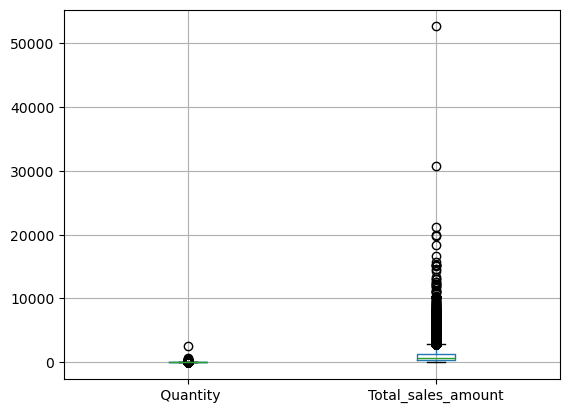

In [25]:
df1[[" Quantity", "Total_sales_amount"]].boxplot();

## Recency

In [26]:
print("RFM: Min Date", df1["Date"].min(), "Max Date", df1["Date"].max())


RFM: Min Date 2024-01-01 00:00:00 Max Date 2024-04-28 00:00:00


In [28]:
recency1 = (dt.datetime(2024, 4, 28) - df1.groupby("Customer_Name").agg({"Date":"max"})).rename(columns = {"Date":"Recency"})
recency1["Recency"] = recency1["Recency"].apply(lambda x: x.days)

In [29]:
recency1.head()

,Recency
Customer_Name,
Noyon Islam '[250858'],7
A B M Zakir Hossain '[000810857'],2
A RAHAMAN '[QL7'],35
A Rahim '[007848'],39
A Rohim '[DDL-00007391'],90


In [30]:
freq1 = df1.groupby("Customer_Name").agg({"Date":"nunique"}).rename(columns={"Date": "Frequency"})
freq1

,Frequency
Customer_Name,
Noyon Islam '[250858'],7
A B M Zakir Hossain '[000810857'],1
A RAHAMAN '[QL7'],3
A Rahim '[007848'],4
A Rohim '[DDL-00007391'],1
...,...
md : khabir fokir '[00G15464'],2
papia Akter '[1101143'],1
shah alam '[10004213'],1


In [45]:
monetary1 = df1.groupby('Customer_Name')['Total_sales_amount'].sum().rename('Monetary').to_frame()


In [46]:
monetary1.head()

,Monetary
Customer_Name,
Noyon Islam '[250858'],6799.00
A B M Zakir Hossain '[000810857'],771.95
A RAHAMAN '[QL7'],3982.09
A Rahim '[007848'],3274.31
A Rohim '[DDL-00007391'],825.00


In [47]:
rfm1 = pd.concat([recency1, freq1, monetary1],  axis=1)
rfm1.head()

,Recency,Frequency,Monetary
Customer_Name,,,
Noyon Islam '[250858'],7,7,6799.00
A B M Zakir Hossain '[000810857'],2,1,771.95
A RAHAMAN '[QL7'],35,3,3982.09
A Rahim '[007848'],39,4,3274.31
A Rohim '[DDL-00007391'],90,1,825.00


In [48]:
rfm1["RecencyScore"] = pd.qcut(rfm1["Recency"], 5, labels = [5, 4 , 3, 2, 1])
rfm1["FrequencyScore"]= pd.qcut(rfm1["Frequency"].rank(method="first"),5, labels=[1,2,3,4,5])
rfm1["MonetaryScore"] = pd.qcut(rfm1['Monetary'], 5, labels = [1, 2, 3, 4, 5])
rfm1.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore
Customer_Name,,,,,,
Noyon Islam '[250858'],7,7,6799.00,4,5,5
A B M Zakir Hossain '[000810857'],2,1,771.95,5,1,2
A RAHAMAN '[QL7'],35,3,3982.09,3,4,4
A Rahim '[007848'],39,4,3274.31,3,4,4
A Rohim '[DDL-00007391'],90,1,825.00,1,1,2


In [49]:
# RFM Scores: Category
rfm1["RFM_SCORE"] = (rfm1['RecencyScore'].astype(str) + 
                     rfm1['FrequencyScore'].astype(str) + 
                     rfm1['MonetaryScore'].astype(str))
rfm1.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
Customer_Name,,,,,,,
Noyon Islam '[250858'],7,7,6799.00,4,5,5,455
A B M Zakir Hossain '[000810857'],2,1,771.95,5,1,2,512
A RAHAMAN '[QL7'],35,3,3982.09,3,4,4,344
A Rahim '[007848'],39,4,3274.31,3,4,4,344
A Rohim '[DDL-00007391'],90,1,825.00,1,1,2,112


In [51]:
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

rfm1['Segment'] = rfm1['RecencyScore'].astype(str) + rfm1['FrequencyScore'].astype(str)
rfm1['Segment'] = rfm1['Segment'].replace(seg_map, regex=True)

rfm1.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
Customer_Name,,,,,,,,
Noyon Islam '[250858'],7,7,6799.00,4,5,5,455,Loyal Customers
A B M Zakir Hossain '[000810857'],2,1,771.95,5,1,2,512,New Customers
A RAHAMAN '[QL7'],35,3,3982.09,3,4,4,344,Loyal Customers
A Rahim '[007848'],39,4,3274.31,3,4,4,344,Loyal Customers
A Rohim '[DDL-00007391'],90,1,825.00,1,1,2,112,Hibernating


In [52]:
rfmStats1 = rfm1[["Segment","Recency","Frequency", "Monetary"]].groupby("Segment").agg(["mean","median","count", "std"])
rfmStats1.columns = rfmStats1.columns.map('_'.join).str.strip('|')
rfmStats1

,Recency_mean,Recency_median,Recency_count,Recency_std,Frequency_mean,Frequency_median,Frequency_count,Frequency_std,Monetary_mean,Monetary_median,Monetary_count,Monetary_std
Segment,,,,,,,,,,,,
About to Sleep,35.11,35.00,2288,5.53,1.00,1.00,2288,0.00,924.38,694.50,2288,927.97
At Risk,69.55,69.00,4842,17.48,2.42,2.00,4842,0.89,2516.53,2111.20,4842,2011.15
Can't Loose,58.20,53.00,556,12.33,6.72,6.00,556,2.21,6591.48,5711.77,556,5049.15
Champions,2.76,3.00,4935,2.05,8.43,7.00,4935,5.73,7440.68,5747.73,4935,6136.71
Hibernating,81.43,80.00,7582,20.51,1.00,1.00,7582,0.00,995.55,720.00,7582,902.25
Loyal Customers,25.13,27.00,5783,12.49,5.51,4.00,5783,3.24,5527.20,4229.00,5783,4548.66
Need Attention,35.62,36.00,1497,5.37,1.92,2.00,1497,0.27,1850.73,1663.19,1497,1385.95
New Customers,2.85,3.00,779,2.09,1.00,1.00,779,0.00,829.30,588.00,779,803.63
Potential Loyalists,10.54,7.00,3433,8.93,1.53,2.00,3433,0.50,1396.36,1065.00,3433,1240.15


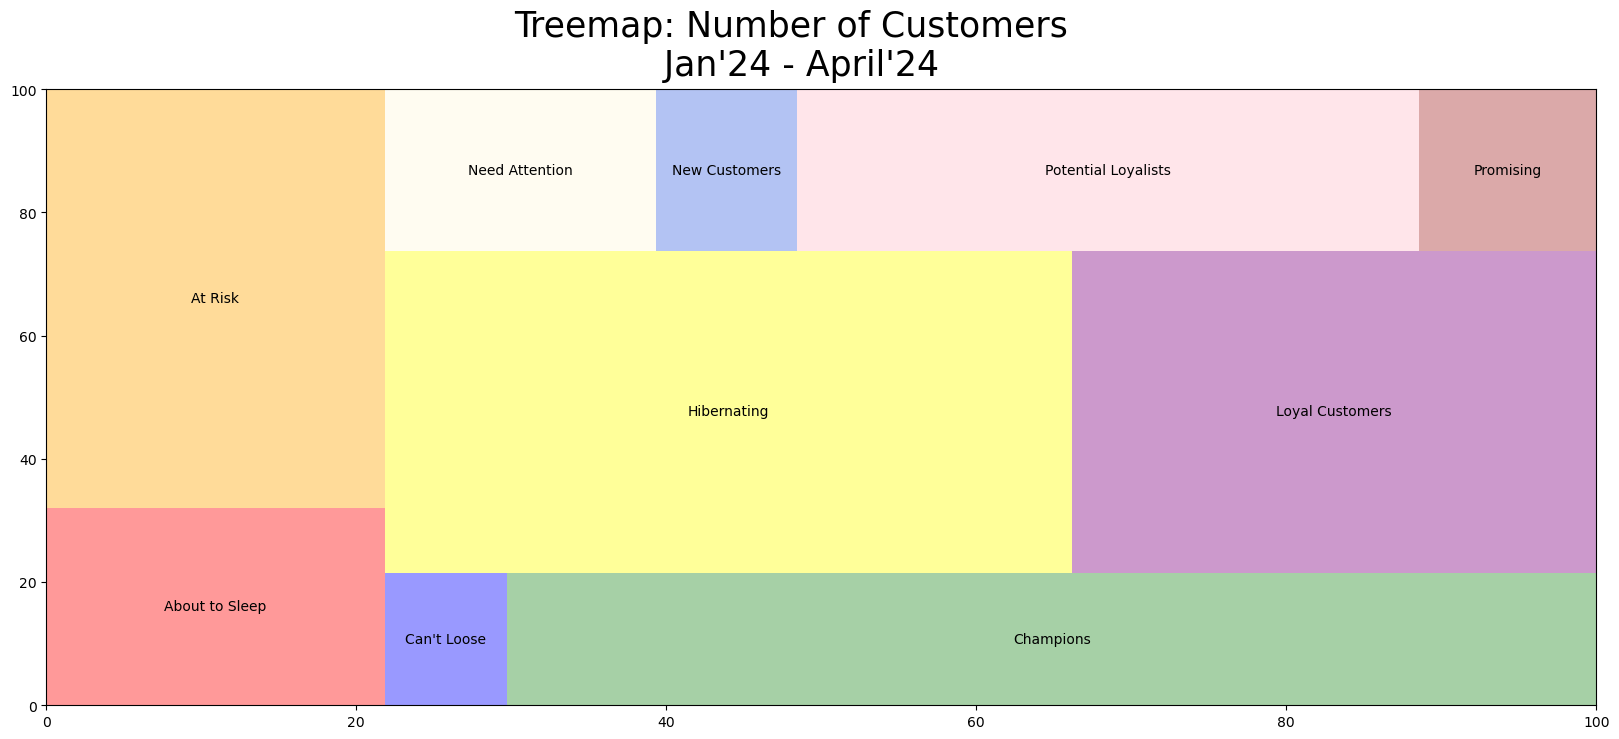

In [60]:
plt.figure(figsize = (20,8))
squarify.plot(sizes=rfmStats1.Recency_count, label=rfmStats1.index, 
              color=["red","orange","blue", "forestgreen", "yellow", "purple", "cornsilk","royalblue", "pink", "brown"], alpha=.4 )
plt.suptitle("Treemap: Number of Customers \n Jan'24 - April'24", fontsize=25);
plt.show()

In [55]:
pip install xlsxwriter


   ---------------------------------------- 0.0/159.9 kB ? eta -:--:--
   -- ------------------------------------- 10.2/159.9 kB ? eta -:--:--
   -------------- ------------------------ 61.4/159.9 kB 656.4 kB/s eta 0:00:01
   ------------------------------ --------- 122.9/159.9 kB 1.0 MB/s eta 0:00:01
   ------------------------------------ - 153.6/159.9 kB 833.5 kB/s eta 0:00:01
   -------------------------------------- 159.9/159.9 kB 796.2 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [61]:
writer = pd.ExcelWriter('rfm_stats.xlsx')  # No engine argument
